## Data client understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy
import numpy as np
import data_understanding_utils as du
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
# not cut columns
pd.set_option('display.max_columns',None)

path= "./data/"
client = pd.read_csv(path+"client.csv", sep=';')

client

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5
...,...,...,...
5364,13955,456030,1
5365,13956,430406,1
5366,13968,680413,61
5367,13971,626019,67


### 2.2 Describe data



#### Dimensions of the dataset 

In [2]:
du.info_data(client,"shape","")
du.info_data(client,"head","")

(5369, 3)

   client_id  birth_number  district_id
0          1        706213           18
1          2        450204            1
2          3        406009            1
3          4        561201            5
4          5        605703            5



#### Info about the dataset

In [3]:
du.info_data(client,"info","")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB
None



In [4]:
du.info_data(client,"isnull","")

Number of null values client_id       0
birth_number    0
district_id     0
dtype: int64



#### Statistical Summary

In [5]:
du.info_data(client,"describe","")
statistical_summary = client.describe()

          client_id   birth_number  district_id
count   5369.000000    5369.000000  5369.000000
mean    3359.011920  535114.970013    37.310114
std     2832.911984  172895.618429    25.043690
min        1.000000  110820.000000     1.000000
25%     1418.000000  406009.000000    14.000000
50%     2839.000000  540829.000000    38.000000
75%     4257.000000  681013.000000    60.000000
max    13998.000000  875927.000000    77.000000



Check for invalid birth dates, genres, and other data quality issues

### Data Summarization

The dataset client, by himself, dont have usefull information to our business goal, but when merged with other datasets, we can have a better understanding of the data. Also, we will need to check for errors, missing values and get information about sex, age, that in a first approach, is not very clear.
We will use the merge of disp.csv and loan.csv to get a better understanding of the data tha relates to the clients.

In [6]:
loans = pd.read_csv (path+"loan_dev.csv", sep=';')
disp = pd.read_csv(path+"disp.csv", sep=';')


#### Search for persons with more than 1 account on disp.csv

In [7]:


res_duplicate = du.check_duplicates(disp,"Disp",["account_id"])

Duplicated rows on Disp: 
      disp_id  client_id  account_id       type
2           3          3           2  DISPONENT
4           5          5           3  DISPONENT
10         11         11           8  DISPONENT
15         16         16          12  DISPONENT
17         18         18          13  DISPONENT
...       ...        ...         ...        ...
5329    13140      13448       10940  DISPONENT
5332    13161      13469       10954  DISPONENT
5346    13350      13658       11111  DISPONENT
5352    13443      13751       11186  DISPONENT
5365    13648      13956       11349  DISPONENT

[869 rows x 4 columns]
Number of repeated values in Disp : 1    869
dtype: int64


#### Search for accounts with more than one loan on loan_dev.csv

In [8]:
res_duplicate = du.check_duplicates(loans,"Loan",["account_id","loan_id"])

Duplicated rows on Loan: 
Empty DataFrame
Columns: [loan_id, account_id, date, amount, duration, payments, status]
Index: []
Number of repeated values in Loan : Series([], dtype: int64)


We can see that we can have an account that belongs to more then one person .
Also, we dont have more then one loan for for an account.

#### Merge client.csv with with loan_dev.csv

In [11]:
client_disp = pd.merge(client, disp,how="left" ,on='client_id')
client_loan = pd.merge(client_disp, loans ,on='account_id')
client_loan

,client_id,birth_number,district_id,disp_id,account_id,type,loan_id,date,amount,duration,payments,status
0,2,450204,1,2,2,OWNER,4959,940105,80952,24,3373,1
1,3,406009,1,3,2,DISPONENT,4959,940105,80952,24,3373,1
2,25,395423,21,25,19,OWNER,4961,960429,30276,12,2523,-1
3,78,445613,16,78,67,OWNER,4973,960502,165960,24,6915,1
4,158,455703,40,158,132,OWNER,4996,961106,88440,12,7370,1
...,...,...,...,...,...,...,...,...,...,...,...,...
398,13845,730216,15,13537,11265,OWNER,7284,930915,52788,12,4399,1
399,13955,456030,1,13647,11349,OWNER,7304,951029,419880,60,6998,1
400,13956,430406,1,13648,11349,DISPONENT,7304,951029,419880,60,6998,1
401,13968,680413,61,13660,11359,OWNER,7305,960806,54024,12,4502,1


We can see that for example, one account can have more than one client (owner or disponent) at same time with the same loan.

Check for null values on the merged dataset

In [14]:
du.info_data(client_loan,"isnull","")


Number of null values client_id       0
birth_number    0
district_id     0
disp_id         0
account_id      0
type            0
loan_id         0
date            0
amount          0
duration        0
payments        0
status          0
dtype: int64



#### Search for loans with more than one associated client with the same account

In [17]:
du.check_duplicates(client_loan,"Client_loan",["account_id","loan_id"])

Duplicated rows on Client_loan: 
     client_id  birth_number  district_id  disp_id  account_id       type  \
1            3        406009            1        3           2  DISPONENT   
5          159        380910           40      159         132  DISPONENT   
7          211        455628           66      211         173  DISPONENT   
15         945        775110           39      945         789  DISPONENT   
25        1134        591001           37     1134         940  DISPONENT   
..         ...           ...          ...      ...         ...        ...   
367      12755        596101           55    12447       10364  DISPONENT   
383      13448        680708           13    13140       10940  DISPONENT   
393      13658        570423           59    13350       11111  DISPONENT   
397      13751        790720           12    13443       11186  DISPONENT   
400      13956        430406            1    13648       11349  DISPONENT   

     loan_id    date  amount  duration  pa

1    75
dtype: int64

In [18]:
statistical_summary = client_loan.describe()
print(statistical_summary)

          client_id   birth_number  district_id       disp_id    account_id  \
count    403.000000     403.000000   403.000000    403.000000    403.000000   
mean    7399.508685  593840.868486    38.200993   7269.583127   6047.535980   
std     3938.580561  128934.718703    24.717243   3809.520678   3181.852656   
min        2.000000  346119.000000     1.000000      2.000000      2.000000   
25%     3798.500000  490161.500000    15.000000   3798.500000   3140.500000   
50%     7422.000000  595717.000000    40.000000   7422.000000   6148.000000   
75%    10559.000000  705214.500000    61.000000  10251.000000   8561.000000   
max    13971.000000  851019.000000    77.000000  13663.000000  11362.000000   

           loan_id           date         amount    duration     payments  \
count   403.000000     403.000000     403.000000  403.000000   403.000000   
mean   6219.419355  950147.595533  147453.558313   36.148883  4190.367246   
std     661.346448    9421.810940  106720.070532   16.768

TODO: Check if loan that have more than one client associated get to pay the loans more often
Check by gender

/home/wolfcuanhamarws/Desktop/Faculdade/2023/AC/Project/AC-Project/Notebooks/data_understanding_utils.py:54: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pyplot.show()


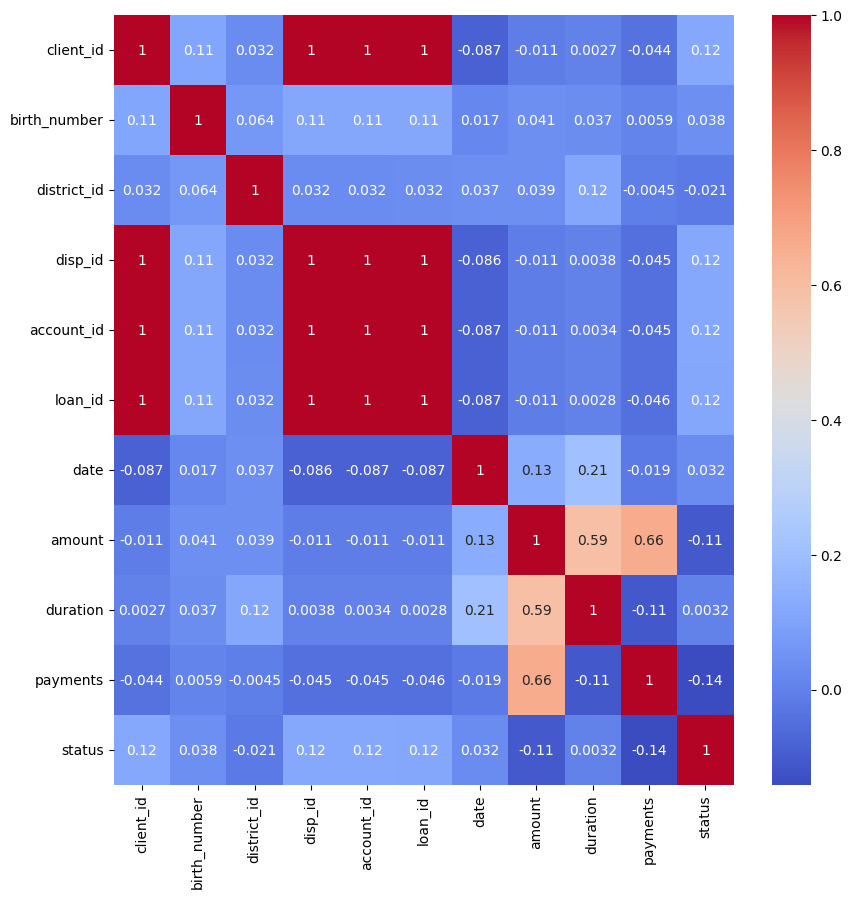

In [19]:
du.data_summarization(client_loan,"correlation")